##### <h1 id="aa" align="center" style="color:white;background:#8B0000;padding:18px;border-radius:15px 50px; font-family:newtimeroman;"> КЛАСТЕРИЗАЦИЯ СУПЕРГЕРОЕВ </h1>



##### <h1 id="bb" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Вступление </h1>

В этой работе мы предпринимаем попытку проанализировать данные о супергероях и разбить их на кластеры. Для этого мы будем использовать методы "обучения без учителя", поскольку не будем использовать явные классы для обучения моделей. После обучения моделей мы проанализируем кластеры, чтобы понять, как каждый признак влияет на формирование групп.

<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px; font-family:newtimeroman;" > Цели: </h1>

<ul>
    <li> **Изучить закономерности** в предоставленных данных о супергероях. </li>
    <li> **Применить метод главных компонент** для уменьшения размерности данных. </li>
    <li> **Выполнить задачу кластеризации** с помощью подходящих алгоритмов. </li>
    <li> **Сравнить предсказанные результаты** с реальными характеристиками супергероев. </li>
    <li> **Проанализировать кластеры**, чтобы понять, как каждый признак влияет на их формирование. </li>
</ul>

<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Описание набора данных </h1>

Этот набор данных содержит информацию о супергероях, включая их физические и бойцовские характеристики, биографические данные и социальные связи. Набор данных состоит из следующих атрибутов:

<ul>
    <li> **id**: Уникальный идентификатор персонажа. </li>
    <li> **name**: Псевдоним или кодовое имя супергероя. </li>
    <li> **intelligence**: Уровень интеллекта персонажа. </li>
    <li> **strength**: Физическая сила персонажа. </li>
    <li> **speed**: Скорость, с которой персонаж может двигаться. </li>
    <li> **durability**: Устойчивость персонажа к повреждениям. </li>
    <li> **power**: Общая сила или способности персонажа. </li>
    <li> **combat**: Боевые навыки и опыт персонажа. </li>
    <li> **full-name**: Реальное или полное имя персонажа. </li>
    <li> **alter-egos**: Другие личности, использованные персонажем. </li>
    <li> **aliases**: Альтернативные имена или титулы. </li>
    <li> **place-of-birth**: Место рождения или создания персонажа. </li>
    <li> **first-appearance**: Первое появление персонажа в комиксе или СМИ. </li>
    <li> **publisher**: Компания, создавшая и издавшая персонажа. </li>
    <li> **alignment**: Моральная ориентация персонажа (добро, зло или нейтралитет, либо просто "-"). </li>
    <li> **gender**: Пол персонажа. </li>
    <li> **race**: Вид или раса персонажа (например, человек, мутант, инопланетянин). </li>
    <li> **height**: Рост персонажа. </li>
    <li> **weight**: Вес персонажа. </li>
    <li> **eye-color**: Цвет глаз персонажа. </li>
    <li> **hair-color**: Цвет волос персонажа. </li>
    <li> **occupation**: Основная профессия или роль персонажа. </li>
    <li> **base**: Основное место дислокации персонажа. </li>
    <li> **group-affiliation**: Команды, организации или альянсы, в которых состоит персонаж. </li>
    <li> **relatives**: Важные члены семьи персонажа. </li>
    <li> **url**: Ссылка на изображение персонажа или более подробную информацию. </li>
</ul>

Этот анализ позволит нам лучше понять, как различные характеристики супергероев влияют на их группировку и какие закономерности можно выявить в данных.


<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Загрузка данных </h1>

## Подключение необходимых библиотек и функций

In [488]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, SpectralClustering


import warnings
warnings.filterwarnings('ignore')

## Обзор датасета

In [489]:
# Определение названий столбцов
colnames = ['id', 'name', 'intelligence', 'strength', 'speed', 'durability', 'power', 'combat', 
           'full-name', 'alter-egos', 'aliases', 'place-of-birth', 'first-appearance', 'publisher', 
           'alignment', 'gender', 'race', 'height', 'weight', 'eye-color', 'hair-color', 'occupation', 
           'base', 'group-affiliation', 'relatives', 'url']

# Загрузка данных
df = pd.read_csv('superheroes_data.csv', names=colnames, header=None)

# Разделение данных на признаки (X) и целевую переменную 
# Для демонстрации предположим, что моральная ориентация персонажа будет использоваться как целевая переменная
X = df  
y = df['alignment']
# Обновим y после замены '-' и удаления 'alignment'
y = df['alignment'].replace('alignment', '-')
# Вывод названий столбцов
Xcol = X.columns
Xcol

Index(['id', 'name', 'intelligence', 'strength', 'speed', 'durability',
       'power', 'combat', 'full-name', 'alter-egos', 'aliases',
       'place-of-birth', 'first-appearance', 'publisher', 'alignment',
       'gender', 'race', 'height', 'weight', 'eye-color', 'hair-color',
       'occupation', 'base', 'group-affiliation', 'relatives', 'url'],
      dtype='object')

In [490]:
# Закодируем типы героев в числовые значения
alignment_mapping = {
    'good': 0,
    'bad': 1,
    'neutral': 2,
    '-': 3 
}

y = df['alignment'].map(alignment_mapping)
# Обновим y после замены '-' и удаления 'alignment'
y = df['alignment'].replace('alignment', '-')
y.value_counts()

alignment
good       494
bad        206
neutral     24
-            8
Name: count, dtype: int64

In [491]:
# Проверка наличия NaN в y
print(y.isnull().sum())

# Если есть NaN, их нужно заменить на подходящее значение
y = y.fillna(4)  # Например, заменяем NaN на 4

# Также убедимся, что все значения в y являются числовыми
y = pd.to_numeric(y, errors='coerce')

# Проверка наличия NaN после преобразования
print(y.isnull().sum())

0
732


In [492]:
X

,id,name,intelligence,strength,speed,durability,power,combat,full-name,alter-egos,...,race,height,weight,eye-color,hair-color,occupation,base,group-affiliation,relatives,url
0,id,name,intelligence,strength,speed,durability,power,combat,full-name,alter-egos,...,race,height,weight,eye-color,hair-color,occupation,base,group-affiliation,relatives,url
1,1,A-Bomb,38,100,17,80,24,64,Richard Milhouse Jones,No alter egos found.,...,Human,"[""6'8"", '203 cm']","['980 lb', '441 kg']",Yellow,No Hair,"Musician, adventurer, author; formerly talk sh...",-,"Hulk Family; Excelsior (sponsor), Avengers (ho...",Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,https://www.superherodb.com/pictures2/portrait...
2,2,Abe Sapien,88,28,35,65,100,85,Abraham Sapien,No alter egos found.,...,Icthyo Sapien,"[""6'3"", '191 cm']","['145 lb', '65 kg']",Blue,No Hair,Paranormal Investigator,-,Bureau for Paranormal Research and Defense,"Edith Howard (wife, deceased)",https://www.superherodb.com/pictures2/portrait...
3,3,Abin Sur,50,90,53,64,99,65,NaN,No alter egos found.,...,Ungaran,"[""6'1"", '185 cm']","['200 lb', '90 kg']",Blue,No Hair,"Green Lantern, former history professor",Oa,"Green Lantern Corps, Black Lantern Corps","Amon Sur (son), Arin Sur (sister), Thaal Sines...",https://www.superherodb.com/pictures2/portrait...
4,4,Abomination,63,80,53,90,62,95,Emil Blonsky,No alter egos found.,...,Human / Radiation,"[""6'8"", '203 cm']","['980 lb', '441 kg']",Green,No Hair,Ex-Spy,Mobile,former member of the crew of the Andromeda Sta...,"Nadia Dornova Blonsky (wife, separated)",https://www.superherodb.com/pictures2/portrait...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,727,Yellowjacket II,50,10,35,28,31,28,Rita DeMara,No alter egos found.,...,Human,"[""5'5"", '165 cm']","['115 lb', '52 kg']",Blue,Strawberry Blond,"Adventurer; former criminal, electronics engineer",New York City area,"Formerly Guardians of the Galaxy, Avengers, Ma...",-,https://www.superherodb.com/pictures2/portrait...
728,728,Ymir,50,100,27,100,98,28,Ymir,No alter egos found.,...,Frost Giant,"['1000', '304.8 meters']","['- lb', '0 kg']",White,No Hair,-,Niffleheim,-,"Utgard-Loki, Loki, and the race of Frost Giant...",https://www.superherodb.com/pictures2/portrait...
729,729,Yoda,88,52,33,25,100,90,Yoda,No alter egos found.,...,Yoda's species,"[""2'2"", '66 cm']","['38 lb', '17 kg']",Brown,White,-,-,"Jedi Order, Jedi High Counsl, Galactic Republic","Master: N'Kata Del Gormo, Apprentices: Dooku, ...",https://www.superherodb.com/pictures2/portrait...
730,730,Zatanna,81,10,23,28,100,56,Zatanna Zatara,No alter egos found.,...,Human,"[""5'7"", '170 cm']","['127 lb', '57 kg']",Blue,Black,-,-,"Misty Kilgore, Seven Soldiers of Victory, Just...","Giovanni ""John"" Zatara (father, deceased), Sin...",https://www.superherodb.com/pictures2/portrait...


In [493]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 732 non-null    object
 1   name               732 non-null    object
 2   intelligence       567 non-null    object
 3   strength           630 non-null    object
 4   speed              567 non-null    object
 5   durability         567 non-null    object
 6   power              567 non-null    object
 7   combat             567 non-null    object
 8   full-name          631 non-null    object
 9   alter-egos         732 non-null    object
 10  aliases            732 non-null    object
 11  place-of-birth     732 non-null    object
 12  first-appearance   732 non-null    object
 13  publisher          717 non-null    object
 14  alignment          732 non-null    object
 15  gender             732 non-null    object
 16  race               430 non-null    object
 1

In [494]:
df.shape

(732, 26)

In [495]:
df.describe(include='all').T

,count,unique,top,freq
id,732,732,id,1
name,732,713,Spider-Man,3
intelligence,567,20,63,111
strength,630,82,10,119
speed,567,44,23,61
durability,567,42,100,80
power,567,96,100,151
combat,567,39,70,53
full-name,631,595,Hank Pym,4
alter-egos,732,76,No alter egos found.,657


##### <h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Интерпретация df.describe(include='all').T </h1>

Метод `describe(include='all')` возвращает **сводную статистику для всех типов данных** (числовых и категориальных). Транспонирование `.T` делает таблицу более читаемой, преобразуя строки в столбцы. 

Для **числовых признаков** (например, `intelligence`, `strength`) выводятся:

<ul>
    <li> <b>count</b>: Количество непустых значений</li>
    <li> <b>mean</b>: Среднее значение</li>
    <li> <b>std</b>: Стандартное отклонение</li>
    <li> <b>min</b>/<b>max</b>: Минимальное/максимальное значение</li>
    <li> <b>25%</b>, <b>50%</b>, <b>75%</b>: Квартили распределения</li>
</ul>

Для **категориальных признаков** (например, `alignment`, `gender`) добавляются:

<ul>
    <li> <b>unique</b>: Количество уникальных значений (для `alignment`: 5 типа)</li>
    <li> <b>top</b>: Наиболее частый элемент (для `alignment`: "good")</li>
    <li> <b>freq</b>: Частота топового элемента (для `alignment`: 494 случая)</li>
</ul>

---



In [496]:
print(df['alignment'].unique())


['alignment' 'good' 'bad' '-' 'neutral']


In [497]:
print(df['alignment'].value_counts())


alignment
good         494
bad          206
neutral       24
-              7
alignment      1
Name: count, dtype: int64


In [498]:
df['alignment'] = df['alignment'].replace('alignment', '-')

In [499]:
print(df['alignment'].unique())
print(df['alignment'].value_counts())

['-' 'good' 'bad' 'neutral']
alignment
good       494
bad        206
neutral     24
-            8
Name: count, dtype: int64


##### <h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Описание данных столбцов </h1>

В этом разделе мы рассмотрим описание каждого столбца в нашем дата сете о супергероях.

- **id**: 
  - Уникальный идентификатор каждого персонажа. Каждое значение уникально и позволяет однозначно идентифицировать супергероя.

- **name**: 
  - Псевдоним или кодовое имя супергероя. Это имя, под которым персонаж известен в комиксах или других СМИ.

- **intelligence**: 
  - Уровень интеллекта персонажа. Значения могут варьироваться в зависимости от способностей и характеристик супергероя.

- **strength**: 
  - Физическая сила персонажа. Это одна из ключевых характеристик, определяющих боевые способности супергероя.

- **speed**: 
  - Скорость, с которой персонаж может двигаться. Более высокие значения указывают на большую скорость и ловкость.

- **durability**: 
  - Устойчивость персонажа к повреждениям. Это показатель того, насколько хорошо супергерой может выдерживать физические атаки.

- **power**: 
  - Общая сила или способности персонажа. Это может включать в себя сверхъестественные способности, магические силы или другие уникальные возможности.

- **combat**: 
  - Боевые навыки и опыт персонажа. Более высокие значения указывают на большую эффективность в бою.

- **full-name**: 
  - Реальное или полное имя персонажа, отличное от его псевдонима или кодового имени.

- **alter-egos**: 
  - Другие личности или альтернативные имена, использованные персонажем в различных ситуациях.

- **aliases**: 
  - Альтернативные имена или титулы, под которыми персонаж известен.

- **place-of-birth**: 
  - Место рождения или создания персонажа. Это может быть город, страна или другое географическое местоположение.

- **first-appearance**: 
  - Первое появление персонажа в комиксе или другом СМИ. Это может быть важной датой в истории персонажа.

- **publisher**: 
  - Компания, создавшая и издавшая персонажа. Это может быть Marvel, DC Comics или другая компания.

- **alignment**: 
  - Моральная ориентация персонажа (добро, зло или нейтралитет, без моральной ориентации). Это определяет поведение и действия персонажа в различных ситуациях.

- **gender**: 
  - Пол персонажа. Это может быть мужской, женский или другой пол.

- **race**: 
  - Вид или раса персонажа (например, человек, мутант, инопланетянин). Это может влиять на способности и характеристики персонажа.

- **height**: 
  - Рост персонажа. Однако, в нашем дата сете этот столбец содержит нечисловые значения и не используется в анализе.

- **weight**: 
  - Вес персонажа. Как и столбец `height`, этот столбец содержит нечисловые значения и не используется.

- **eye-color**: 
  - Цвет глаз персонажа. Это может быть важной характеристикой для определенных сюжетных линий или способностей.

- **hair-color**: 
  - Цвет волос персонажа. Это также может быть важной визуальной характеристикой.

- **occupation**: 
  - Основная профессия или роль персонажа, помимо его супергеройской деятельности.

- **base**: 
  - Основное место дислокации персонажа. Это может быть город, база или другое место, где персонаж проводит большую часть времени.

- **group-affiliation**: 
  - Команды, организации или альянсы, в которых состоит персонаж. Это может включать в себя известные команды супергероев.

- **relatives**: 
  - Важные члены семьи или родственники персонажа. Это может быть важно для сюжетных линий и развития персонажа.

- **url**: 
  - Ссылка на изображение персонажа или более подробную информацию о нем.


<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Разведочный анализ </h1>

In [500]:
X.describe()

,id,name,intelligence,strength,speed,durability,power,combat,full-name,alter-egos,...,race,height,weight,eye-color,hair-color,occupation,base,group-affiliation,relatives,url
count,732,732,567,630,567,567,567,567,631,732,...,430,732,732,732,732,732,732,732,732,732
unique,732,713,20,82,44,42,96,39,595,76,...,63,72,170,26,31,387,285,483,460,732
top,id,Spider-Man,63,10,23,100,100,70,Hank Pym,No alter egos found.,...,Human,"['-', '0 cm']","['- lb', '0 kg']",Blue,-,-,-,-,-,url
freq,1,3,111,119,61,80,151,53,4,657,...,206,215,235,219,171,294,378,217,268,1



Результат анализа показывает следующую информацию:

- **count**: Количество строк в каждом столбце.
- **unique**: Количество уникальных значений в каждом столбце.
- **top**: Наиболее часто встречающееся значение в каждом столбце.
- **freq**: Частота появления наиболее часто встречающегося значения.

Эта информация помогает понять структуру данных и распределение значений в нечисловых столбцах.

In [501]:
# Список столбцов, которые должны быть числовыми
numeric_columns = ['intelligence', 'strength', 'speed', 'durability', 'power', 'combat']

# Преобразование нечисловых значений в NaN
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Теперь мы можем посмотреть статистические показатели
df[numeric_columns].describe()

,intelligence,strength,speed,durability,power,combat
count,566.000000,629.000000,566.000000,566.000000,566.000000,566.000000
mean,64.445230,44.001590,40.249117,58.973498,64.243816,61.597173
std,19.989369,32.886676,24.416224,30.060311,29.797914,23.349979
min,6.000000,4.000000,1.000000,1.000000,0.000000,5.000000
25%,50.000000,10.000000,23.000000,30.000000,38.000000,42.000000
50%,63.000000,35.000000,33.000000,60.000000,63.500000,64.000000
75%,75.000000,80.000000,50.000000,89.750000,100.000000,80.000000
max,100.000000,100.000000,100.000000,110.000000,100.000000,101.000000


<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Масштабирование данных для кластеризации </h1>
При выполнении кластеризации важно учитывать масштаб данных. Если признаки имеют сильно различающийся масштаб, это может повлиять на результаты кластеризации, поскольку алгоритмы кластеризации часто чувствительны к масштабу данных.

<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Почему масштабировать данные? </h1>
Равный вес признаков: если признаки сильно различаются по масштабу, те, которые имеют больший диапазон, могут доминировать в кластеризации. Масштабирование помогает сделать признаки равнозначными.

Улучшение интерпретируемости: если все признаки находятся в одном диапазоне, это может упростить интерпретацию результатов.

<h1 id="aa" style="цвет: белый;фон:#B00000;отступ: 8 пикселей;радиус границы: 8 пикселей;семейство шрифтов:newtimeroman;"> Как масштабировать данные? </h1>
Мы можем использовать метод MinMaxScaler из библиотеки sklearn.preprocessing для масштабирования данных в диапазоне от 0 до 100:

In [502]:
# Масштабирование данных
scaler = MinMaxScaler(feature_range=(0, 100))  # Масштабируем в диапазон от 0 до 100
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Теперь мы можем посмотреть статистические показатели
df[numeric_columns].describe()

,intelligence,strength,speed,durability,power,combat
count,566.000000,629.000000,566.000000,566.000000,566.000000,566.000000
mean,62.175776,41.668323,39.645572,53.186696,64.243816,58.955389
std,21.265286,34.256954,24.662852,27.578267,29.797914,24.322895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.808511,6.250000,22.222222,26.605505,38.000000,38.541667
50%,60.638298,32.291667,32.323232,54.128440,63.500000,61.458333
75%,73.404255,79.166667,49.494949,81.422018,100.000000,78.125000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Важные моменты </h1>
Потеря информации: Масштабирование может привести к потере информации о реальных масштабах данных.

Не всегда необходимо: Если признаки уже находятся в примерно одном диапазоне или если мы используем алгоритмы, которые не чувствительны к масштабу (например, некоторые методы кластеризации, такие как DBSCAN), масштабирование может быть не нужно.

<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Выводы </h1>
Масштабирование может быть полезным для обеспечения равного веса признаков в кластеризации.

Однако, следует учитывать потенциальную потерю информации и необходимость масштабирования в зависимости от используемых алгоритмов и характеристик данных.

In [503]:
# Проверка на пропущенные значения
print(df[numeric_columns].isnull().sum())

intelligence    166
strength        103
speed           166
durability      166
power           166
combat          166
dtype: int64


In [504]:
# Заполнение пропусков средним значением
for column in numeric_columns:
    mean_value = df[column].mean()
    df[column] = df[column].fillna(mean_value)

# Проверка, что пропусков больше нет
print(df[numeric_columns].isnull().sum())

intelligence    0
strength        0
speed           0
durability      0
power           0
combat          0
dtype: int64


In [505]:
# 1. Проверка на дубликаты
duplicates = df.duplicated().sum()
print(f'Количество дубликатов в датафрейме: {duplicates}')
# В датафрейме нет дубликатов, если duplicates == 0

Количество дубликатов в датафрейме: 0


In [506]:
# 2. Проверка пропусков
print('\nПропуски в датафрейме:')
print(df.isnull().sum())


Пропуски в датафрейме:
id                     0
name                   0
intelligence           0
strength               0
speed                  0
durability             0
power                  0
combat                 0
full-name            101
alter-egos             0
aliases                0
place-of-birth         0
first-appearance       0
publisher             15
alignment              0
gender                 0
race                 302
height                 0
weight                 0
eye-color              0
hair-color             0
occupation             0
base                   0
group-affiliation      0
relatives              0
url                    0
dtype: int64


In [507]:
#заполним пропуски специальным значением, таким как 'Unknown', чтобы обозначить, что информация отсутствует.
df['full-name'] = df['full-name'].fillna('Unknown')
df['race'] = df['race'].fillna('Unknown')
df['publisher'] = df['publisher'].fillna('Unknown')

In [508]:
print('\nПропуски в датафрейме:')
print(df.isnull().sum())


Пропуски в датафрейме:
id                   0
name                 0
intelligence         0
strength             0
speed                0
durability           0
power                0
combat               0
full-name            0
alter-egos           0
aliases              0
place-of-birth       0
first-appearance     0
publisher            0
alignment            0
gender               0
race                 0
height               0
weight               0
eye-color            0
hair-color           0
occupation           0
base                 0
group-affiliation    0
relatives            0
url                  0
dtype: int64


In [509]:
# Создание сводной таблицы с типами данных и количеством уникальных значений
dtypes_unique = pd.concat([df.dtypes, df.nunique()], axis=1).rename(columns={0: "Type", 1: "Number of unique"})

# Вывод результатов
print(dtypes_unique)

                      Type  Number of unique
id                  object               732
name                object               713
intelligence       float64                20
strength           float64                82
speed              float64                44
durability         float64                42
power              float64                96
combat             float64                39
full-name           object               596
alter-egos          object                76
aliases             object               482
place-of-birth      object               243
first-appearance    object               557
publisher           object                90
alignment           object                 4
gender              object                 4
race                object                64
height              object                72
weight              object               170
eye-color           object                26
hair-color          object                31
occupation

## Идентификация корреляций между переменными

In [510]:
numeric_columns = ['intelligence', 'strength', 'speed', 'durability', 'power', 'combat']
df_numeric = df[numeric_columns].copy()
print(df_numeric.isnull().sum())
df_numeric.describe()

intelligence    0
strength        0
speed           0
durability      0
power           0
combat          0
dtype: int64


,intelligence,strength,speed,durability,power,combat
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,62.175776,41.668323,39.645572,53.186696,64.243816,58.955389
std,18.695486,31.751912,21.682474,24.245576,26.196990,21.383599
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53.191489,8.333333,24.242424,35.779817,47.000000,52.083333
50%,62.175776,41.668323,39.645572,53.186696,64.243816,58.955389
75%,73.404255,65.625000,45.707071,72.477064,88.250000,72.916667
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


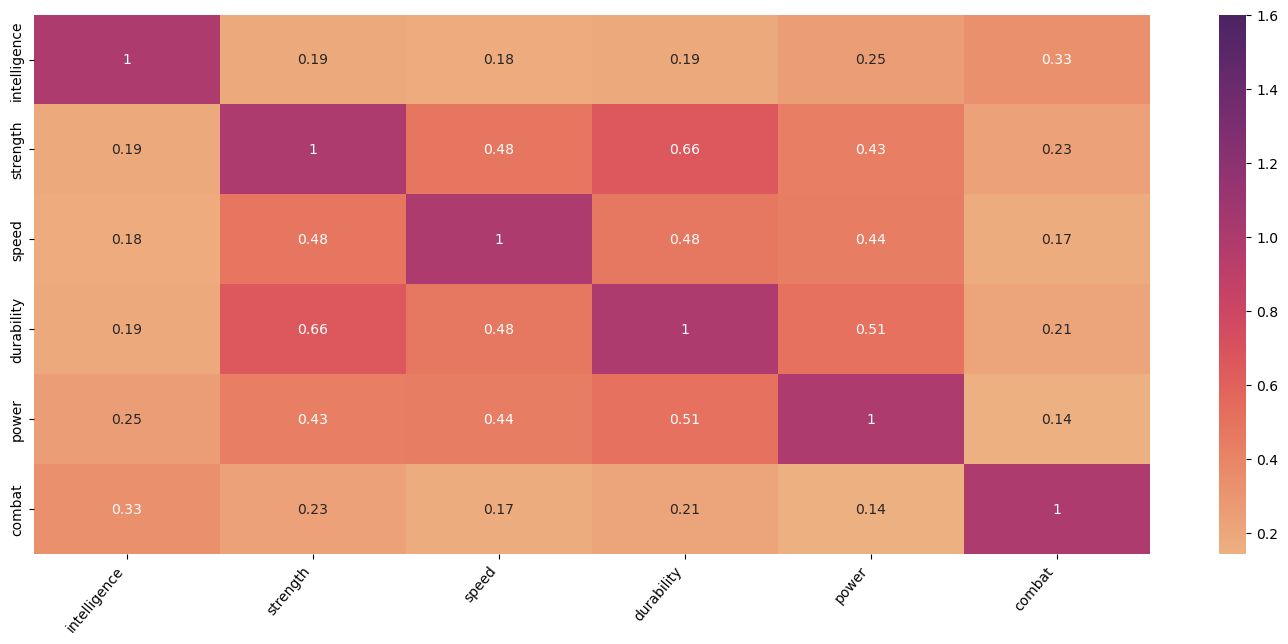

In [511]:
y = df['alignment'].replace('alignment', '-')
# Визуализация корреляций между числовыми переменными
plt.figure(figsize=(18, 7))
sns.heatmap(df_numeric.corr(), cmap=sns.color_palette("flare", as_cmap=True), annot=True, vmax=1.6)
plt.xticks(rotation=50, ha='right')
plt.show()

## Распределение данных

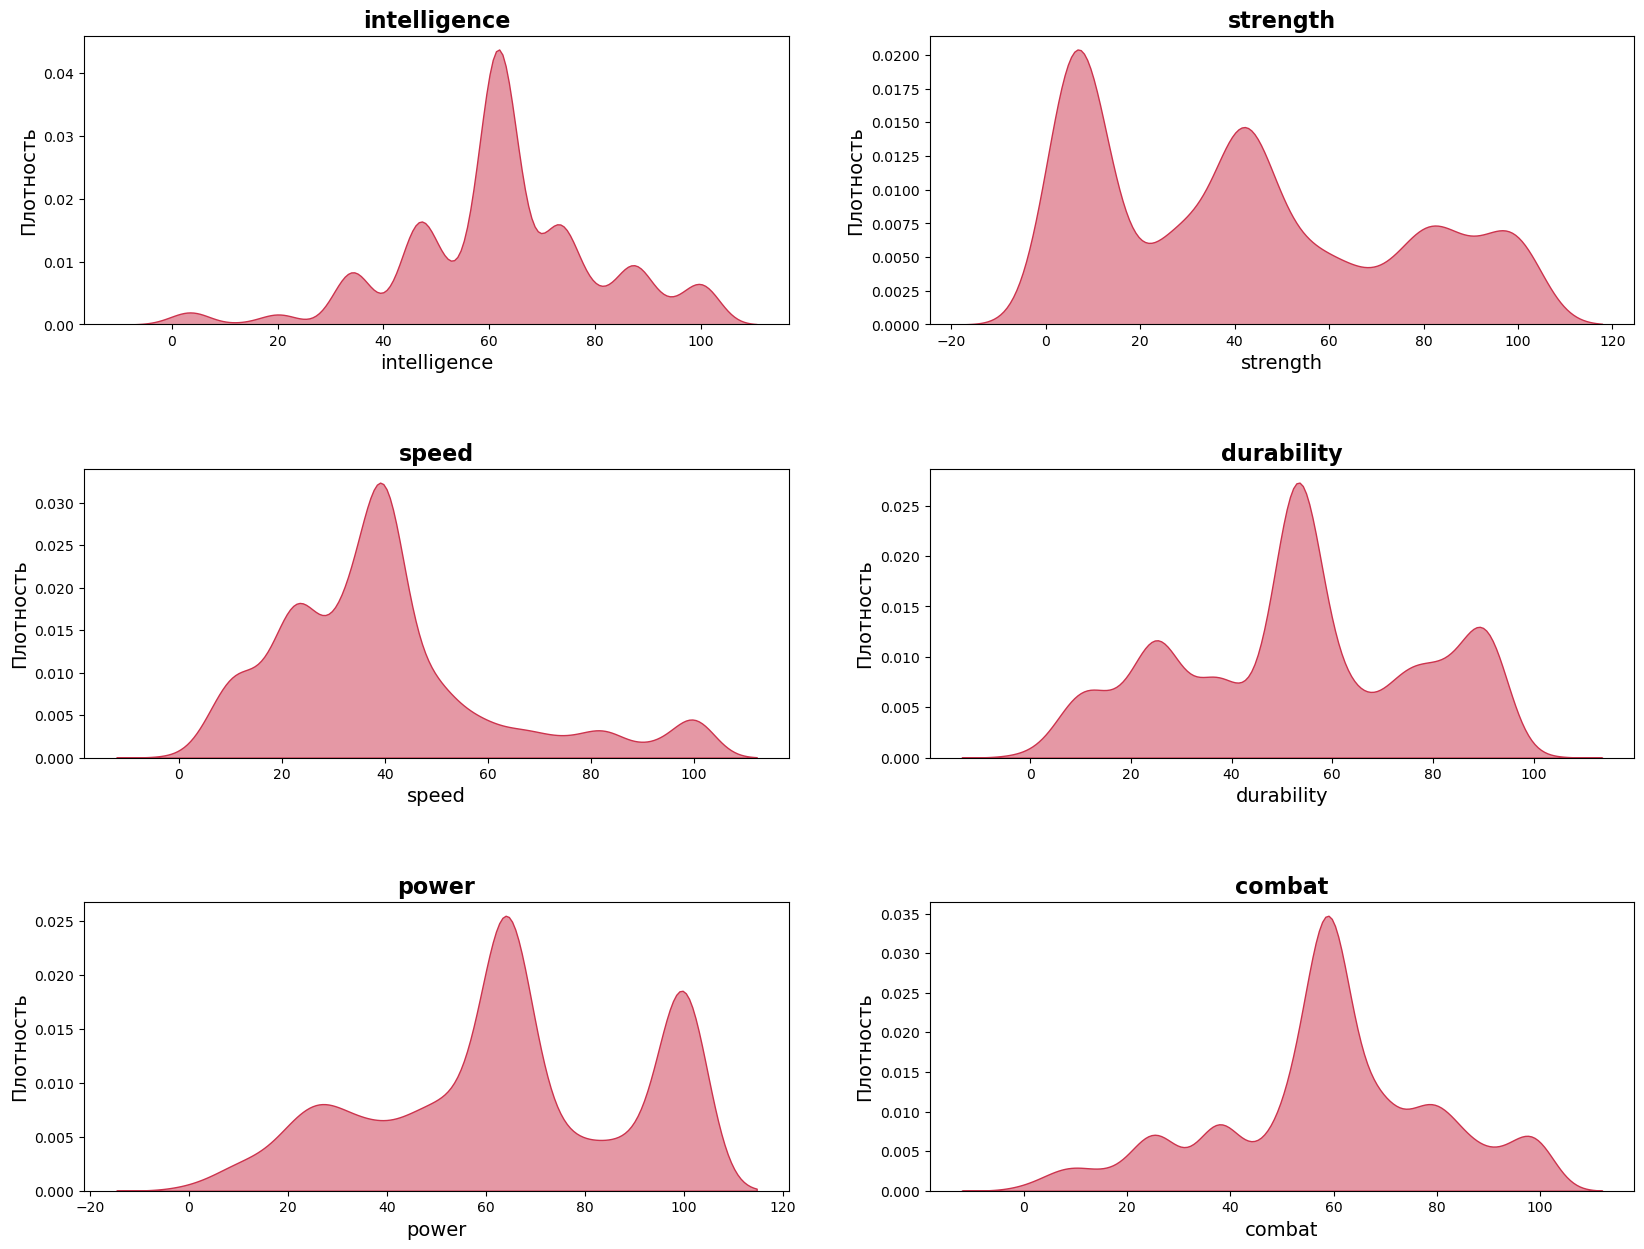

In [512]:
# Создаем матрицу графиков для визуализации распределения по каждой переменной
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

# Расстояние между графиками
plt.subplots_adjust(hspace=0.5)

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(df_numeric.columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data=df_numeric,
                x=column,
                fill=True,
                alpha=0.5,
                bw_adjust=.7,
                color=[0.8, 0.2, 0.3],
                ax=ax)
    
    ax.set_title(column, fontweight='bold', fontsize=16)
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel('Плотность', fontsize=14)

plt.show()

<ul>
<li>  Некоторые признаки близки к нормальному распределению</li> 
<li> Остальные признаки имеют скос или несколько мод (в основном 2)</li> 
<li> Явновыраженных выбросов не обнаружено</li>
</ul>

<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Метод главных компонет </h1>


Метод главных компонент может быть полезен в задаче классификации при большом количестве признаков, так как значительно улучшает результаты работы ансамблевых методов. Однако в данном случае решается задача кластеризация, где всего 6 признаков, поэтому он будет использоваться только для упрощения восприятия данных в виде двумерного и трехмерного графиков. 

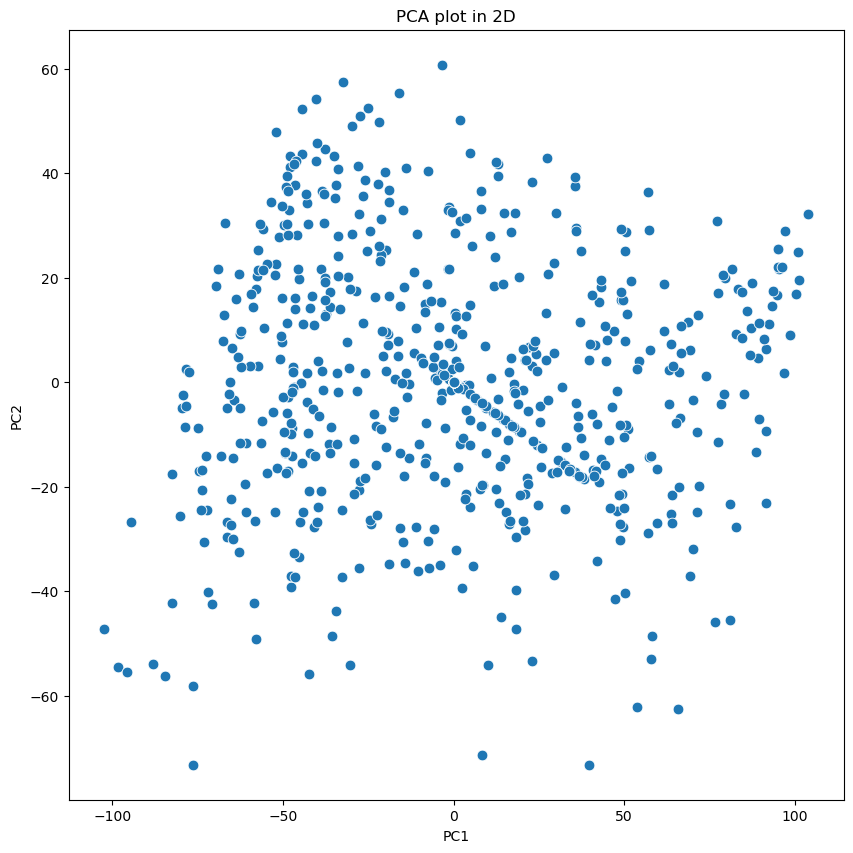

In [513]:
# Применение метода главных компонент для уменьшения размерности до 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_df = pd.DataFrame(data=pca.fit_transform(df_numeric), columns=['PC1', 'PC2'])

# Визуализация результатов PCA
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=principal_df['PC1'], 
                y=principal_df['PC2'], 
                s=60)

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [514]:
def TSNEplot(pred=None):
    # Применение t-SNE для уменьшения размерности
    from sklearn.manifold import TSNE
    tsne = TSNE(random_state=1)
    X_tsne = tsne.fit_transform(df_numeric)

    # Визуализация результатов t-SNE
    plt.figure(figsize=(12, 10))
    if pred is not None:
        plt.scatter(X_tsne[:, 0], 
                    X_tsne[:, 1], 
                    c=pred, 
                    edgecolor="none", 
                    alpha=0.7, s=40,
                    cmap=plt.cm.get_cmap("flare", 3))
        plt.colorbar()
    else:
        plt.scatter(X_tsne[:, 0], 
                    X_tsne[:, 1], 
                    edgecolor="none", 
                    alpha=0.7, s=40)

    plt.title("t-SNE projection")
    plt.show()

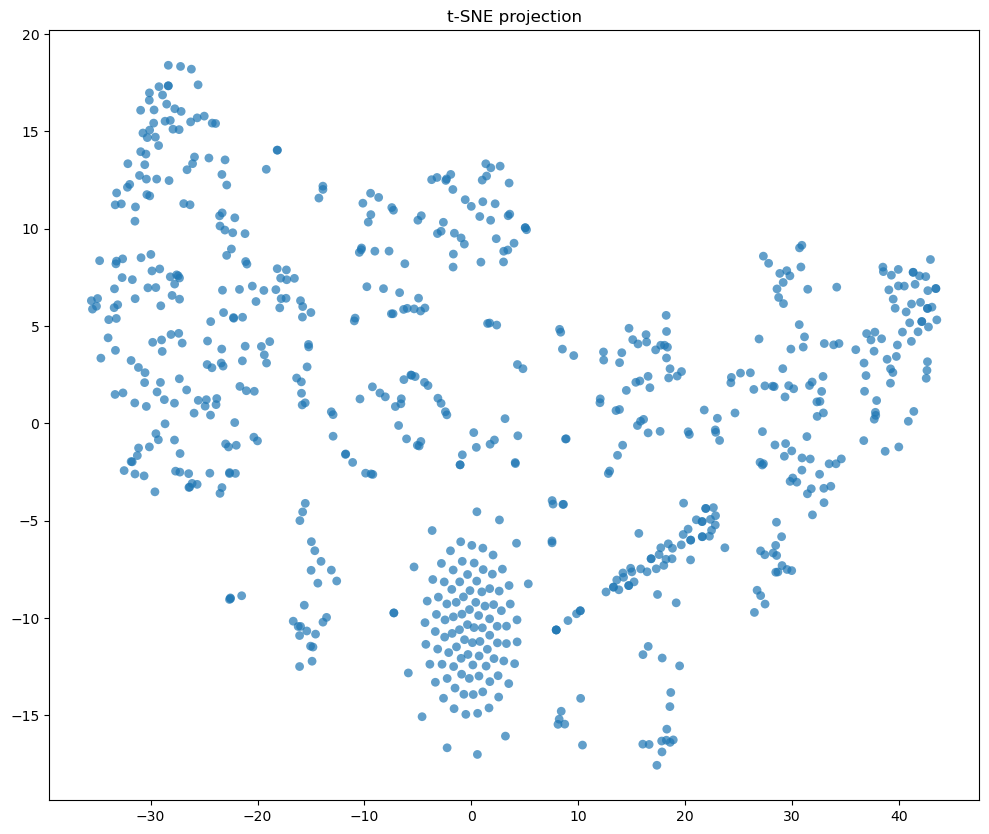

In [515]:
# Без предсказанных классов
TSNEplot()

In [516]:
import plotly.express as px
import numpy as np

def PCAplot3D(x_data, y_data=None):
    # Применение метода главных компонент для уменьшения размерности до 3D
    from sklearn.decomposition import PCA
    components = PCA(n_components=3).fit_transform(x_data)
    # Визуализация результатов PCA в 3D
    fig = px.scatter_3d(
        components, 
        x=0, y=1, z=2, 
        color=y_data if y_data is not None else np.zeros(len(x_data)), 
        size=0.1*np.ones(len(x_data)), 
        opacity=1,
        title='PCA plot in 3D',
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
        width=900, height=900
    )
    fig.show()

In [517]:
# Вызов функции PCAplot3D
PCAplot3D(df_numeric)

<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Моделирование </h1>

## Выбор метода кластеризации
Кластеризация ассоциируется с методом k-средних. Однако он не является единственным, и только в библиотеке представлено несколько методов, некоторые из которых могут решать общие задачи, а другие лучше подходят для определенного типа задач.

В данном случае известно следующее:

<ul> <li> Набор данных содержит числовые признаки, что позволяет использовать различные методы кластеризации. </li> <li> Количество данных умеренное, что позволяет использовать методы, не требующие слишком больших вычислительных ресурсов. </li> <li> При визуальном осмотре данных можно наблюдать несколько кластеров, что подтверждает возможность использования кластеризации. </li> <li> Проекция на плоскость имеет достаточно большую дисперсию, что может потребовать использования методов, которые хорошо справляются с разбросанными данными. </li> </ul>
Мы выбрали методы K-Means, спектральную кластеризацию и агломеративную кластеризацию по Уорду. Их основным параметром является количество кластеров, и на графике распределения, похожем на наш, эти методы показывают достаточно хорошие результаты.
Эти методы будут основными кандидатами для кластеризации наших данных, учитывая их характеристики и визуальные особенности.

# K-Means

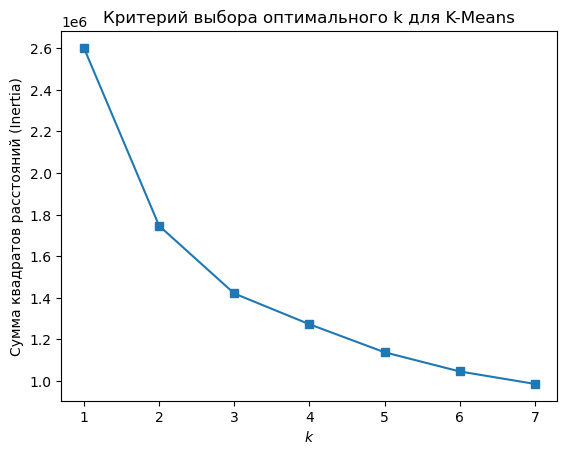

In [518]:
# Оценка качества кластеризации K-Means для разных значений k
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init='auto').fit(df_numeric)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 8), inertia, marker="s")
plt.xlabel("$k$")
plt.ylabel("Сумма квадратов расстояний (Inertia)")
plt.title("Критерий выбора оптимального k для K-Means")
plt.show()

In [519]:
# Применение метода главных компонент для уменьшения размерности до 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# Кластеризация с помощью K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=1, n_init='auto').fit(df_numeric)
centroids_pca = pca.fit_transform(kmeans.cluster_centers_)
pred_k = kmeans.labels_

# Преобразование данных в 2D с помощью PCA
principal_df = pd.DataFrame(data=pca.fit_transform(df_numeric))

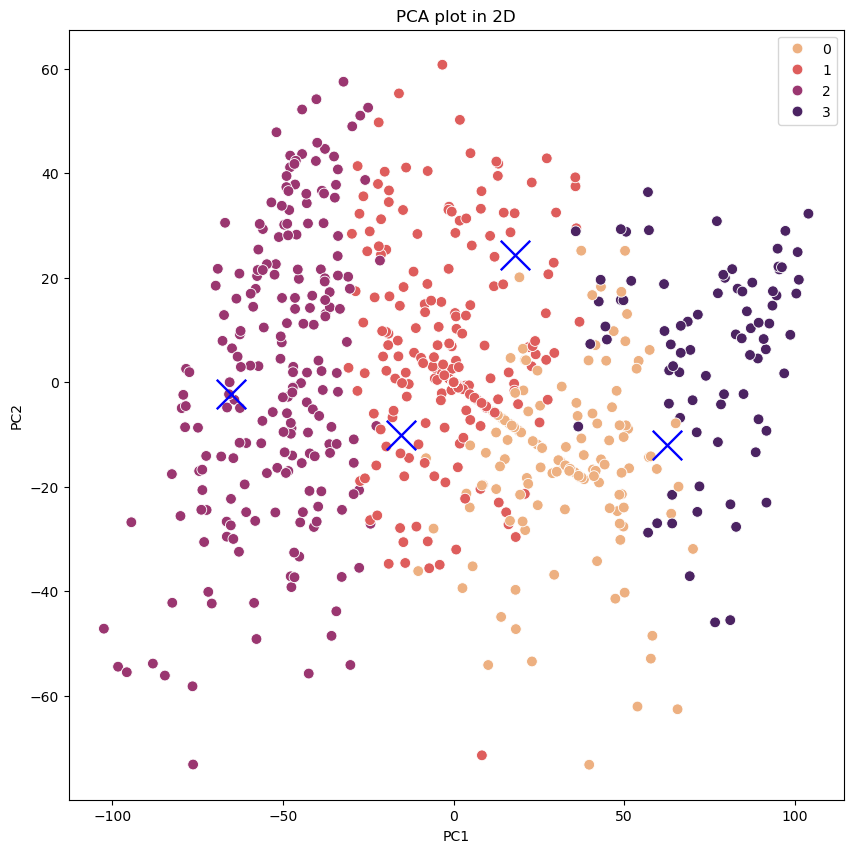

In [520]:
# Визуализация результатов кластеризации на графике PCA
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=principal_df.iloc[:,0], 
                y=principal_df.iloc[:,1], 
                hue=pred_k, 
                palette="flare", 
                s=60)
sns.scatterplot(x=centroids_pca[:,0], 
                y=centroids_pca[:,1],  
                marker="x", 
                s=450, 
                color='blue')
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

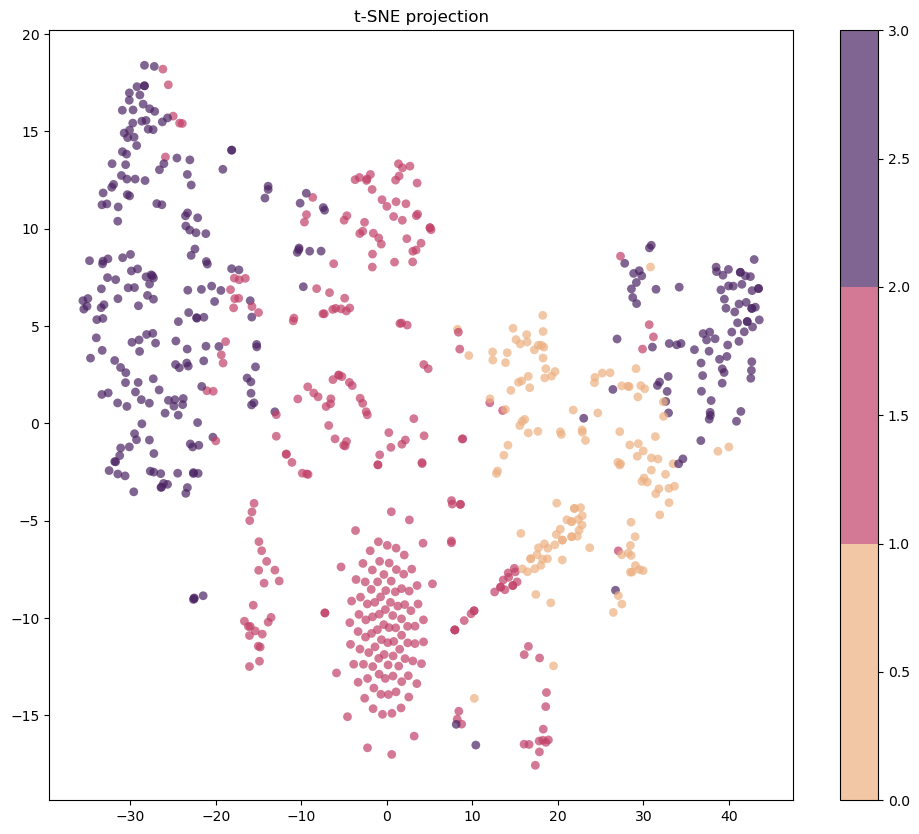

In [521]:
# Визуализация результатов кластеризации на графике t-SNE
TSNEplot(pred_k)

In [522]:
# Визуализация результатов кластеризации на графике PCA 3D
PCAplot3D(df_numeric, pred_k)

# Agglomerative Clustering by Ward

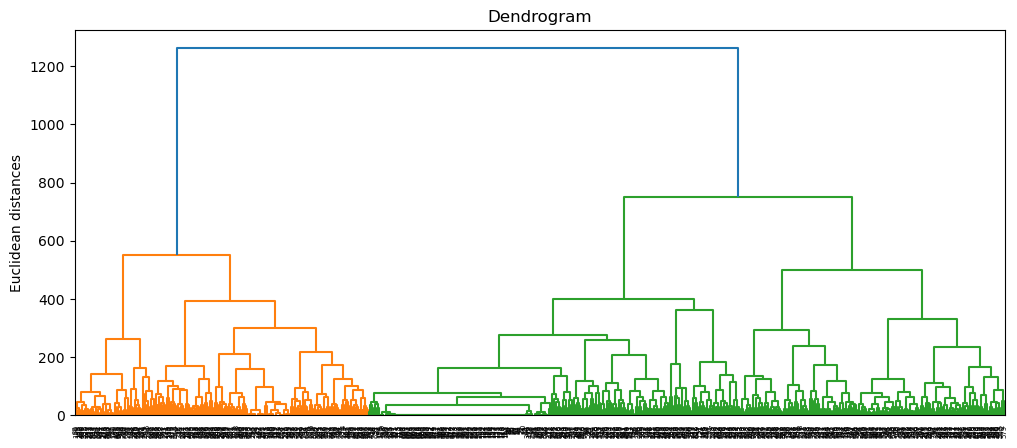

In [523]:
# Визуализация дендрограммы для Agglomerative Clustering by Ward
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(df_numeric, method='ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [524]:
# Кластеризация с помощью Agglomerative Clustering by Ward
from sklearn.cluster import AgglomerativeClustering
clustering_ward = AgglomerativeClustering(n_clusters=4).fit(df_numeric)
pred_ward = clustering_ward.labels_

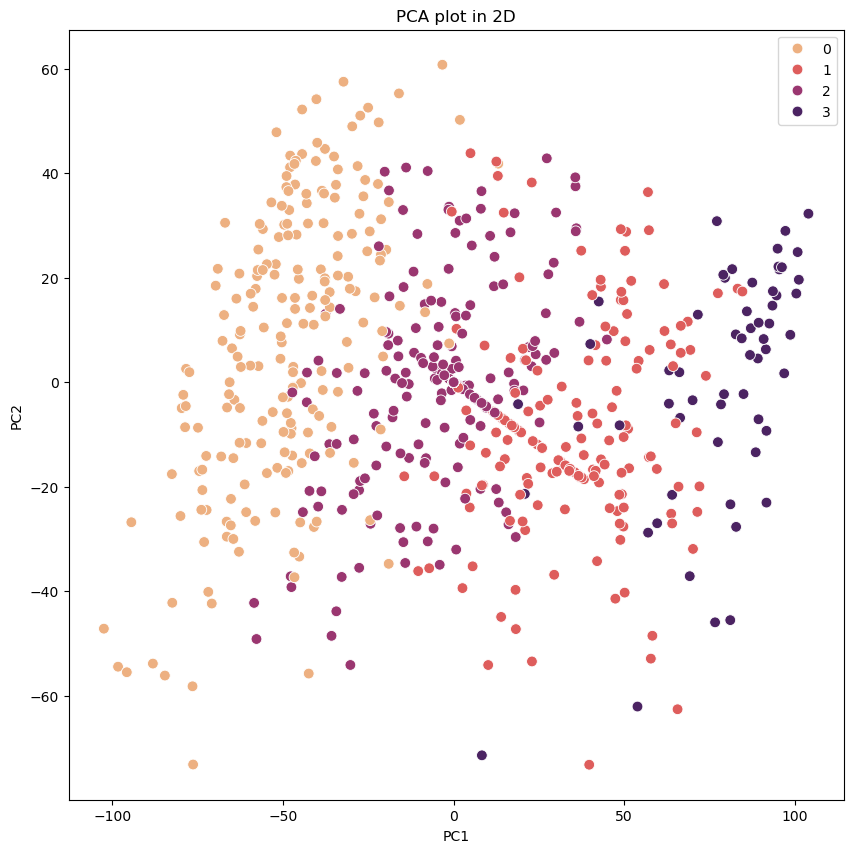

In [525]:
# Визуализация результатов кластеризации на графике PCA
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=principal_df.iloc[:,0], 
                y=principal_df.iloc[:,1], 
                hue=pred_ward, 
                palette="flare", 
                s=60)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

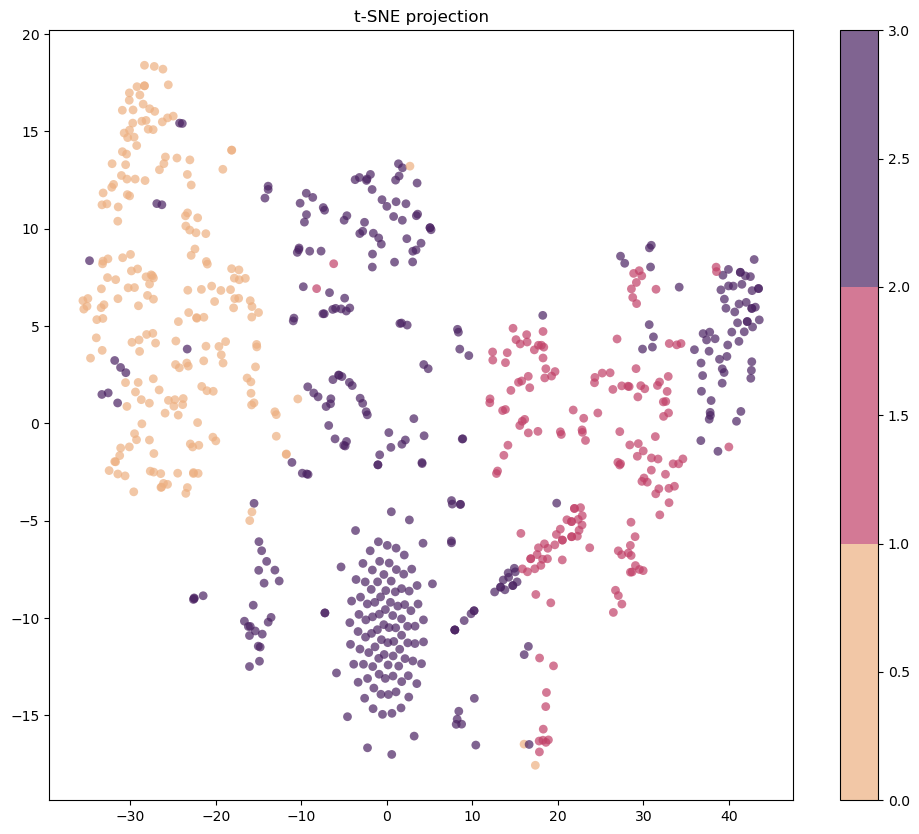

In [526]:
# Визуализация результатов кластеризации на графике t-SNE
TSNEplot(pred_ward)

In [527]:
# Визуализация результатов кластеризации на графике PCA 3D
PCAplot3D(df_numeric, pred_ward)

# Spectral Clustering

In [528]:
# Кластеризация с помощью Spectral Clustering
from sklearn.cluster import SpectralClustering
clustering_sp = SpectralClustering(n_clusters=4).fit(df_numeric)
pred_sp = clustering_sp.labels_

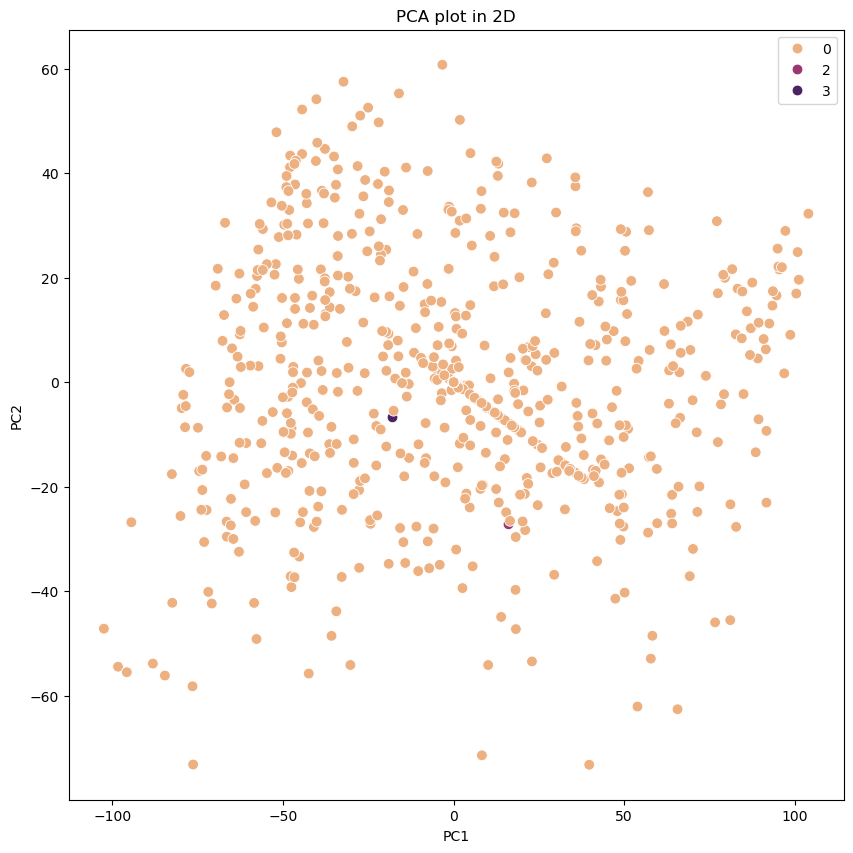

In [529]:
# Визуализация результатов кластеризации на графике PCA
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=principal_df.iloc[:,0], 
                y=principal_df.iloc[:,1], 
                hue=pred_sp, 
                palette="flare", 
                s=60)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

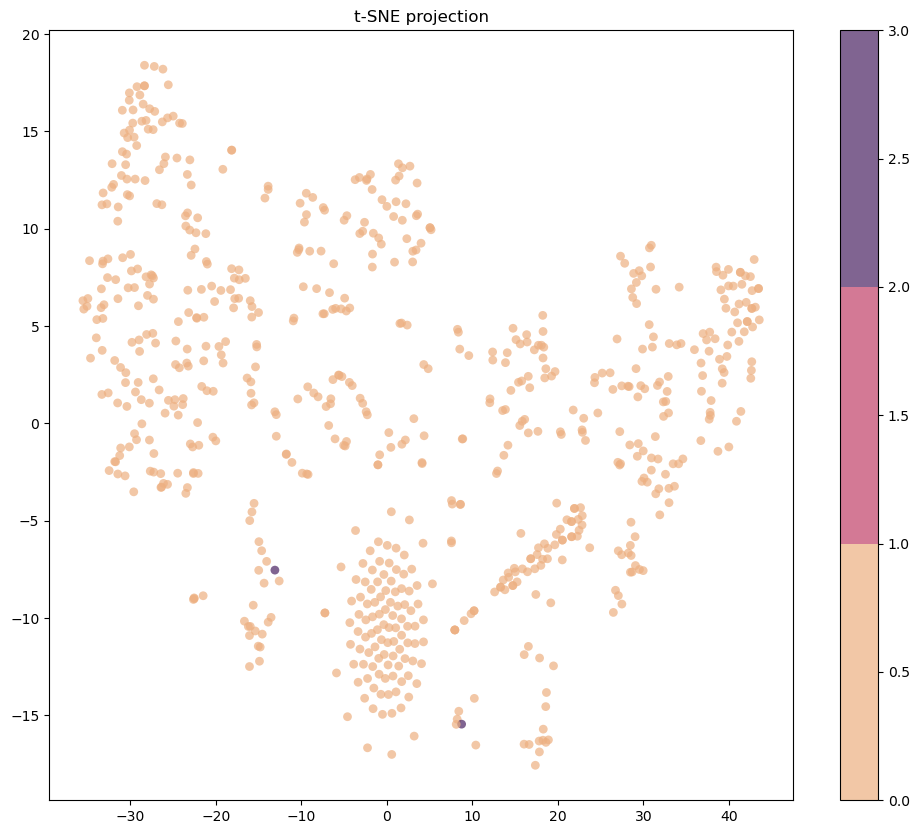

In [530]:
# Визуализация результатов кластеризации на графике t-SNE
TSNEplot(pred_sp)

In [531]:
# Визуализация результатов кластеризации на графике PCA 3D
PCAplot3D(df_numeric, pred_sp)

<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Сравнение реальных и предсказанных кластеров </h1>

Создаем фрейм данных df_clusters, в котором хранятся предсказанные классы для каждого метода кластеризации
(K-Means, агломеративная кластеризация и спектральная кластеризация).
Затем визуализируем распределение этих классов с помощью круговых диаграмм и гистограмм.


Проценты для каждого типа:
Тип 0: 494 (67.5%)
Тип 1: 206 (28.1%)
Тип 2: 24 (3.3%)
Тип 3: 8 (1.1%)


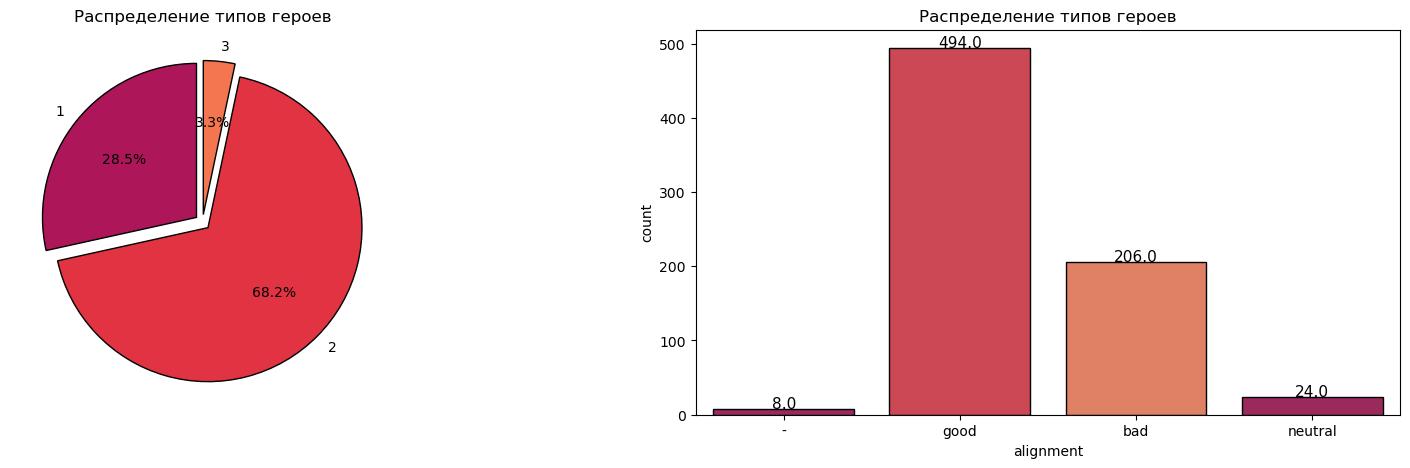

In [532]:
l = list(y.value_counts())
sumLenn = sum(l)
proc = [l[1] / sumLenn * 100, l[0] / sumLenn * 100, l[2] / sumLenn * 100]
colors1 = sns.color_palette("rocket")[2:5]


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20, 5))
plt.subplot(1, 2, 1)
plt.pie(proc, labels = ['1', '2', '3'], 
        autopct = '%1.1f%%', 
        startangle = 90,
        explode = (0.05,0.05, 0.05), 
        colors = colors1, 
        wedgeprops = {'edgecolor' : 'black','antialiased' : True})
plt.title('Распределение типов героев')

plt.subplot(1, 2, 2)
ax = sns.countplot(x = y, 
                   hue = y, 
                   palette = colors1, 
                   edgecolor = "black" )
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.7,\
            rect.get_height() , horizontalalignment='center', fontsize = 11)
plt.title('Распределение типов героев');
# Рассчитаем проценты для каждого типа
l = list(y.value_counts())
sumLenn = sum(l)
proc = [x / sumLenn * 100 for x in l]

# Выведим проценты для каждого типа
print("\nПроценты для каждого типа:")
for i, (count, percent) in enumerate(zip(l, proc)):
    print(f"Тип {i}: {count} ({percent:.1f}%)")

# RAND_SCORE

In [533]:
rs_k = rand_score(kmeans.labels_, y) 
rs_ward = rand_score(pred_ward, y)
rs_sp = rand_score(pred_sp, y)

print('\nK-Means')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 732 предсказано верно \n\n\n\n".format(rs_k, rs_k * 178))


print('Agglomerative Clustering')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 732 предсказано верно \n\n\n\n".format(rs_ward, rs_ward * 178))


print('Spectral Clustering')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 732 предсказано верно \n".format(rs_sp, rs_sp * 178))


K-Means
_____________________________________________

 rand_score = 0.49731634933805774 

 88.52231018217428 из 732 предсказано верно 




Agglomerative Clustering
_____________________________________________

 rand_score = 0.4955222653300741 

 88.20296322875319 из 732 предсказано верно 




Spectral Clustering
_____________________________________________

 rand_score = 0.5354406345077108 

 95.30843294237253 из 732 предсказано верно 



<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Анализ результатов </h1>
Результаты кластеризации с использованием rand_score показывают, что ни один из методов не дал высокого качества кластеризации. Это может быть связано с несколькими факторами:

<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Причины плохого результата </h1>
Несовместимость метрики и задачи: rand_score используется для оценки качества кластеризации по сравнению с реальными классами. Однако, если реальные классы не идеально соответствуют кластерам, полученным алгоритмами, результат может быть низким.

Различные масштабы признаков: Если признаки имеют сильно разные масштабы, это может повлиять на результаты кластеризации. В нашем случае, хотя мы преобразовали данные в числовой формат, возможно, не все признаки имеют одинаковый вес в кластеризации.

Недостаточное количество кластеров: Если количество кластеров, заданное в алгоритмах (например, K-Means), не соответствует реальному количеству классов в данных, это может привести к низкому качеству кластеризации.

Сложность данных: Если данные имеют сложную структуру или шум, это может затруднить получение высококачественных результатов кластеризации.

<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Возможные решения </h1>
Масштабирование данных: Убедимся, что все признаки находятся в одном диапазоне. Используем MinMaxScaler или StandardScaler для нормализации данных.

Выбор оптимального количества кластеров: Используем методы, такие как "локоть" (elbow method) или silhouette score, чтобы определить оптимальное количество кластеров для ваших данных.

Использование других алгоритмов кластеризации: Попробуем использовать другие алгоритмы, такие как DBSCAN или OPTICS, которые могут лучше работать с данными сложной структуры.

Проверка качества данных: Убедимся, что данные чистые и не содержат шума или пропущенных значений, которые могут влиять на результаты.

Использование других метрик качества: Попробуем использовать другие метрики, такие как adjusted_rand_score, которые могут быть более подходящими для вашей задачи.

## Распределение атрибутов реальных кластеров

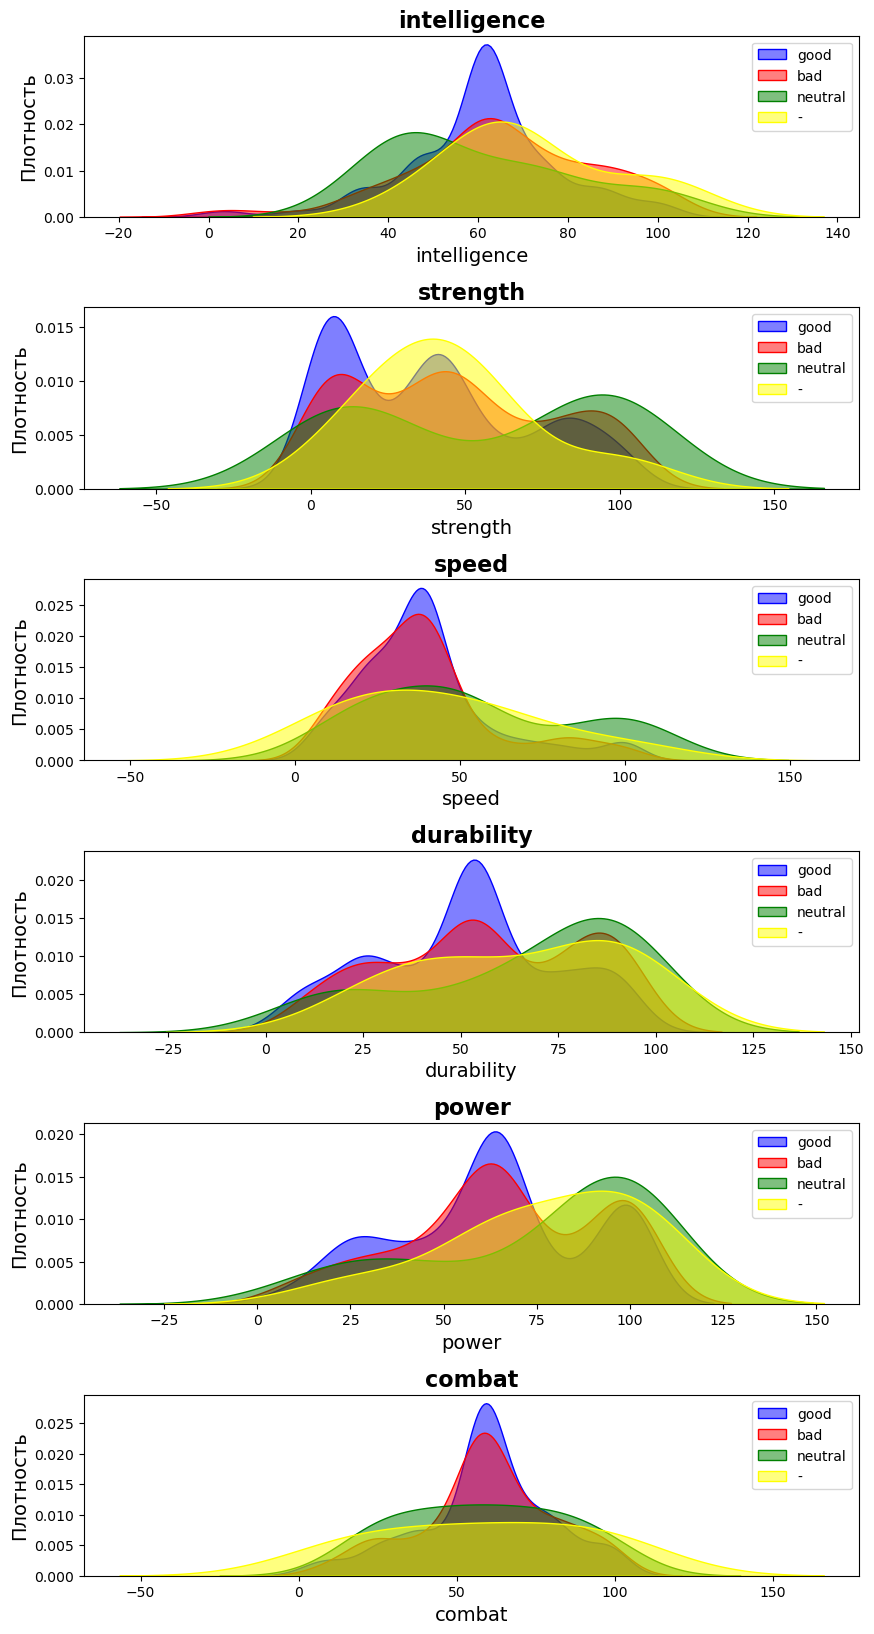

In [534]:
# Создаем матрицу графиков для визуализации распределения по каждой переменной
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, 20))

# Расстояние между графиками
plt.subplots_adjust(hspace=0.5)

# Определение цветов для каждого класса
colors = {
    'good': 'blue',
    'bad': 'red',
    'neutral': 'green',
    '-': 'yellow'
}

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    for alignment, color in colors.items():
        mask = df['alignment'] == alignment
        sns.kdeplot(data=df[mask],
                    x=column,
                    fill=True,
                    alpha=0.5,
                    color=color,
                    label=alignment,
                    ax=ax)
    
    ax.set_title(column, fontweight='bold', fontsize=16)
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel('Плотность', fontsize=14)
    ax.legend()

plt.show()

<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Заключение </h1>

В ходе работы были выполнены все задачи, поставленные в начале.
Методы, выбранные для моделирования, сработали плохо. Spectral Clustering показал себя лучше всех.